In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
def getCSV(csv):
    dfl = pd.read_csv(csv)
    return dfl
df = getCSV(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\FertilityRatesEurope.csv') 
print(df)

           Statistic Label  Year       Countries  UNIT  VALUE
0    Total fertility rates  2014         Albania  Rate    1.7
1    Total fertility rates  2014         Austria  Rate    1.5
2    Total fertility rates  2014         Belgium  Rate    1.7
3    Total fertility rates  2014        Bulgaria  Rate    1.5
4    Total fertility rates  2014         Croatia  Rate    1.5
..                     ...   ...             ...   ...    ...
299  Total fertility rates  2021           Spain  Rate    1.2
300  Total fertility rates  2021          Sweden  Rate    1.7
301  Total fertility rates  2021     Switzerland  Rate    1.5
302  Total fertility rates  2021         Turkiye  Rate    NaN
303  Total fertility rates  2021  United Kingdom  Rate    1.5

[304 rows x 5 columns]


In [34]:
year = 2021
checklist = ["Austria", "Belgium", "Denmark", "France", "Germany", "Ireland", "Italy", "Netherlands", "Poland", "Spain", "United Kingdom"]
filtered_df = df[(df['Year'] == year) & (df['Countries'].isin(checklist))]
print(filtered_df)

           Statistic Label  Year       Countries  UNIT  VALUE
267  Total fertility rates  2021         Austria  Rate    1.5
268  Total fertility rates  2021         Belgium  Rate    1.6
273  Total fertility rates  2021         Denmark  Rate    1.7
277  Total fertility rates  2021          France  Rate    1.8
278  Total fertility rates  2021         Germany  Rate    1.6
282  Total fertility rates  2021         Ireland  Rate    1.8
283  Total fertility rates  2021           Italy  Rate    1.3
291  Total fertility rates  2021     Netherlands  Rate    1.6
293  Total fertility rates  2021          Poland  Rate    1.3
299  Total fertility rates  2021           Spain  Rate    1.2
303  Total fertility rates  2021  United Kingdom  Rate    1.5


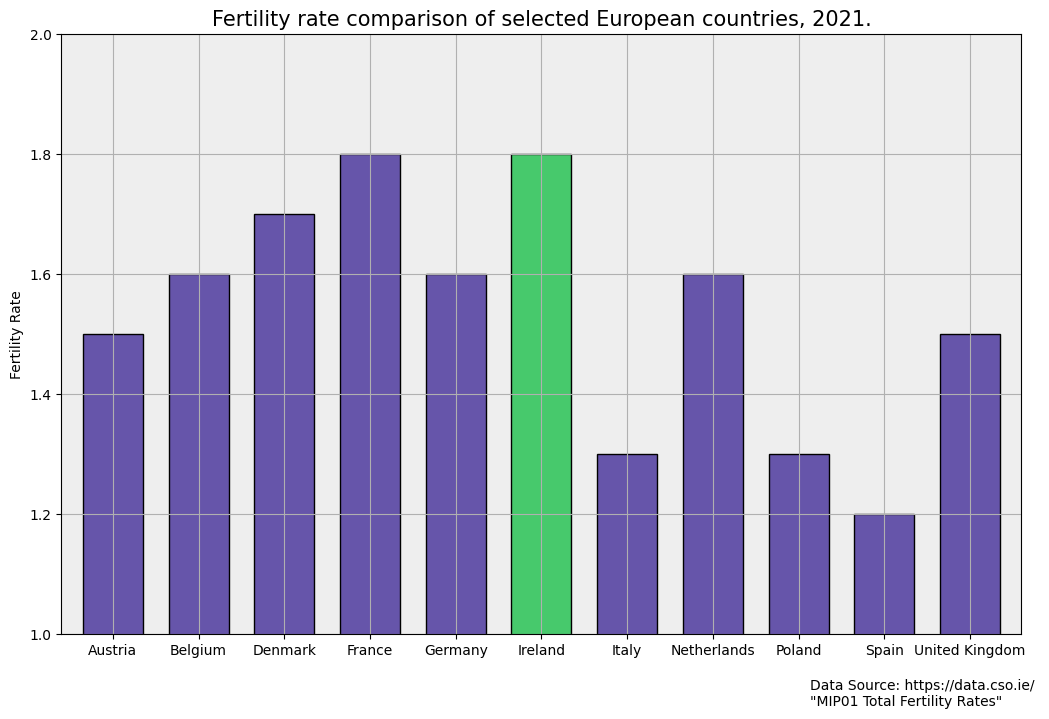

In [35]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

colors=["#6655AA" for i in range(len(checklist))]
colors[5] = "#47C96C"
filtered_df.plot(kind='bar', x='Countries', y='VALUE', ax=ax, color=colors, width=.7, edgecolor="black")

plt.title("Fertility rate comparison of selected European countries, "+str(year)+".", fontsize=15) 
ax.set_facecolor('#EEEEEE') 
plt.xlabel('')
plt.ylabel('Fertility Rate')
plt.xticks(rotation=0)
ax.set_ylim(1,2)
#plt.legend(title="Students", labels=["Number of students"])
ax.get_legend().remove()
plt.tight_layout()
plt.grid(True)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
plt.text(0.78, -0.120, "Data Source: https://data.cso.ie/ \n\"MIP01 Total Fertility Rates\"", ha='left', transform=ax.transAxes)

plt.savefig('FertilityBar-'+str(year)+'.png')

plt.show()

In [77]:
c1="Ireland"
c2="Germany"
filtered_df = df[(df['Countries'] == c1) | (df['Countries'] == c2)]
print(filtered_df)

           Statistic Label  Year Countries  UNIT  VALUE
12   Total fertility rates  2014   Germany  Rate    1.5
16   Total fertility rates  2014   Ireland  Rate    1.9
50   Total fertility rates  2015   Germany  Rate    1.5
54   Total fertility rates  2015   Ireland  Rate    1.9
88   Total fertility rates  2016   Germany  Rate    1.6
92   Total fertility rates  2016   Ireland  Rate    1.8
126  Total fertility rates  2017   Germany  Rate    1.6
130  Total fertility rates  2017   Ireland  Rate    1.8
164  Total fertility rates  2018   Germany  Rate    1.6
168  Total fertility rates  2018   Ireland  Rate    1.8
202  Total fertility rates  2019   Germany  Rate    1.5
206  Total fertility rates  2019   Ireland  Rate    1.7
240  Total fertility rates  2020   Germany  Rate    1.5
244  Total fertility rates  2020   Ireland  Rate    1.6
278  Total fertility rates  2021   Germany  Rate    1.6
282  Total fertility rates  2021   Ireland  Rate    1.8


In [78]:
grouped = filtered_df.groupby('Countries')

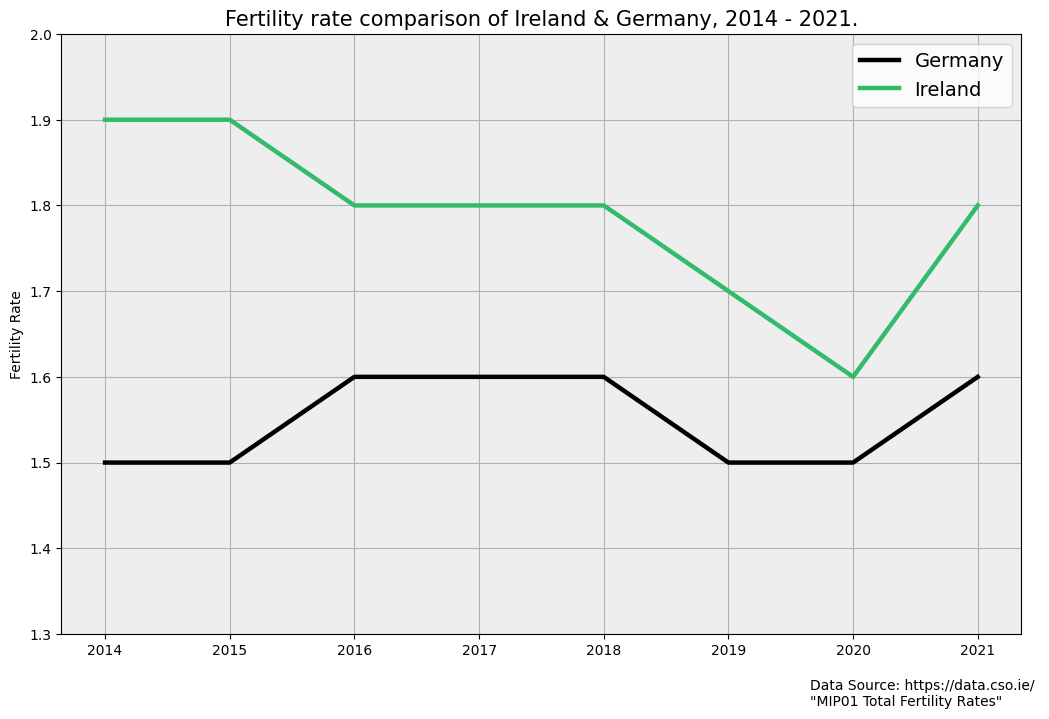

In [81]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
colors=["black", "#33BB6C"]
i=0
for group,data in grouped: 
    plt.plot(data['Year'], data['VALUE'], label=group,color=colors[i],linewidth=3.2)
    i+=1
    
plt.title("Fertility rate comparison of "+c1+" & "+c2+", 2014 - 2021.", fontsize=15) 
ax.set_facecolor('#EEEEEE') 
plt.xlabel('')
plt.ylabel('Fertility Rate')
plt.xticks(rotation=0)
ax.set_ylim(1.3,2)
plt.legend(title="", labels=[c2, c1], fontsize=14)
#ax.get_legend().remove()
plt.tight_layout()
plt.grid(True)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
plt.text(0.78, -0.120, "Data Source: https://data.cso.ie/ \n\"MIP01 Total Fertility Rates\"", ha='left', transform=ax.transAxes)

plt.savefig("Fertility rate comparison of "+c1+" and "+c2+".png")

plt.show()